In [21]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [34]:
ticker = "bb"
period = "5y"
stock = yf.Ticker(ticker.upper())
history = stock.history(period=period)

In [25]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-02-04 00:00:00-05:00,2.15,2.17,1.90,1.92,16788600,0.00,0.00
1999-02-05 00:00:00-05:00,1.93,1.95,1.82,1.83,3053400,0.00,0.00
1999-02-08 00:00:00-05:00,1.85,1.93,1.78,1.81,1548000,0.00,0.00
1999-02-09 00:00:00-05:00,1.82,1.83,1.66,1.67,3501600,0.00,0.00
1999-02-10 00:00:00-05:00,1.71,1.71,1.60,1.68,1597200,0.00,0.00
...,...,...,...,...,...,...,...
2024-04-03 00:00:00-04:00,2.77,2.87,2.77,2.81,10785300,0.00,0.00
2024-04-04 00:00:00-04:00,2.96,3.11,2.78,2.88,23700500,0.00,0.00
2024-04-05 00:00:00-04:00,2.91,2.91,2.79,2.82,9460700,0.00,0.00


In [26]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"6,335.00","6,335.00","6,335.00","6,335.00","6,335.00","6,335.00","6,335.00"
mean,21.32,21.76,20.84,21.29,"15,569,541.47",0.00,0.00
std,26.83,27.33,26.23,26.78,"20,095,929.31",0.00,0.05
min,1.29,1.29,1.14,1.27,"244,200.00",0.00,0.00
25%,6.15,6.28,6.00,6.14,"5,212,500.00",0.00,0.00
50%,9.79,10.00,9.57,9.76,"10,825,100.00",0.00,0.00
75%,23.47,23.94,22.94,23.37,"19,262,200.00",0.00,0.00
max,146.48,148.13,143.89,147.55,"536,739,400.00",0.00,3.00


In [27]:
stock.info

{'address1': '2200 University Avenue East',
 'city': 'Waterloo',
 'state': 'ON',
 'zip': 'N2K 0A7',
 'country': 'Canada',
 'phone': '519-888-7465',
 'website': 'https://www.blackberry.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'BlackBerry Limited provides intelligent security software and services to enterprises and governments worldwide. The company operates through three segments: Cybersecurity, IoT, and Licensing and Other. The company offers CylanceENDPOINT, an integrated endpoint security solution; CylanceGUARD, a managed detection and response solution; CylanceEDGE, an AI-powered continuous authentication zero trust network access solution; CylanceINTELLIGENCE\x99, a contextual cyber threat intelligence service; BlackBerry Dynamics offers a development platform and secure container f

In [28]:
stock.financials

,2023-02-28,2022-02-28,2021-02-28
Tax Effect Of Unusual Items,"-253,600,000.00","7,736,842.11","-5,199,460.92"
Tax Rate For Calcs,0.40,0.37,0.01
Normalized EBITDA,"515,000,000.00","-59,000,000.00","743,000,000.00"
Total Unusual Items,"-634,000,000.00","21,000,000.00","-643,000,000.00"
Total Unusual Items Excluding Goodwill,"-634,000,000.00","21,000,000.00","-643,000,000.00"
Net Income From Continuing Operation Net Minority Interest,"-734,000,000.00","12,000,000.00","-1,104,000,000.00"
Reconciled Depreciation,"105,000,000.00","176,000,000.00","198,000,000.00"
Reconciled Cost Of Revenue,"228,000,000.00","240,000,000.00","234,000,000.00"
EBITDA,"-119,000,000.00","-38,000,000.00","100,000,000.00"
EBIT,"-224,000,000.00","-214,000,000.00","-98,000,000.00"


In [29]:
stock.cash_flow

,2023-02-28,2022-02-28,2021-02-28
Free Cash Flow,"-304,000,000.00","-67,000,000.00","38,000,000.00"
Repayment Of Debt,0.00,0.00,"-611,000,000.00"
Issuance Of Debt,0.00,0.00,"365,000,000.00"
Issuance Of Capital Stock,"6,000,000.00","10,000,000.00","19,000,000.00"
Capital Expenditure,"-41,000,000.00","-39,000,000.00","-44,000,000.00"
End Cash Position,"322,000,000.00","406,000,000.00","218,000,000.00"
Beginning Cash Position,"406,000,000.00","218,000,000.00","426,000,000.00"
Effect Of Exchange Rate Changes,"-3,000,000.00","-1,000,000.00","2,000,000.00"
Changes In Cash,"-81,000,000.00","189,000,000.00","-210,000,000.00"
Financing Cash Flow,"6,000,000.00","10,000,000.00","-227,000,000.00"


In [30]:
stock.balance_sheet

,2023-02-28,2022-02-28,2021-02-28
Ordinary Shares Number,"582,157,203.00","576,227,898.00","565,505,328.00"
Share Issued,"582,157,203.00","576,227,898.00","565,505,328.00"
Net Debt,"72,000,000.00","129,000,000.00","506,000,000.00"
Total Debt,"443,000,000.00","601,000,000.00","843,000,000.00"
Tangible Book Value,"59,000,000.00","190,000,000.00","-116,000,000.00"
...,...,...,...
Cash Cash Equivalents And Short Term Investments,"426,000,000.00","712,000,000.00","739,000,000.00"
Other Short Term Investments,"131,000,000.00","334,000,000.00","525,000,000.00"
Cash And Cash Equivalents,"295,000,000.00","378,000,000.00","214,000,000.00"
Cash Equivalents,"208,000,000.00","274,000,000.00","49,000,000.00"


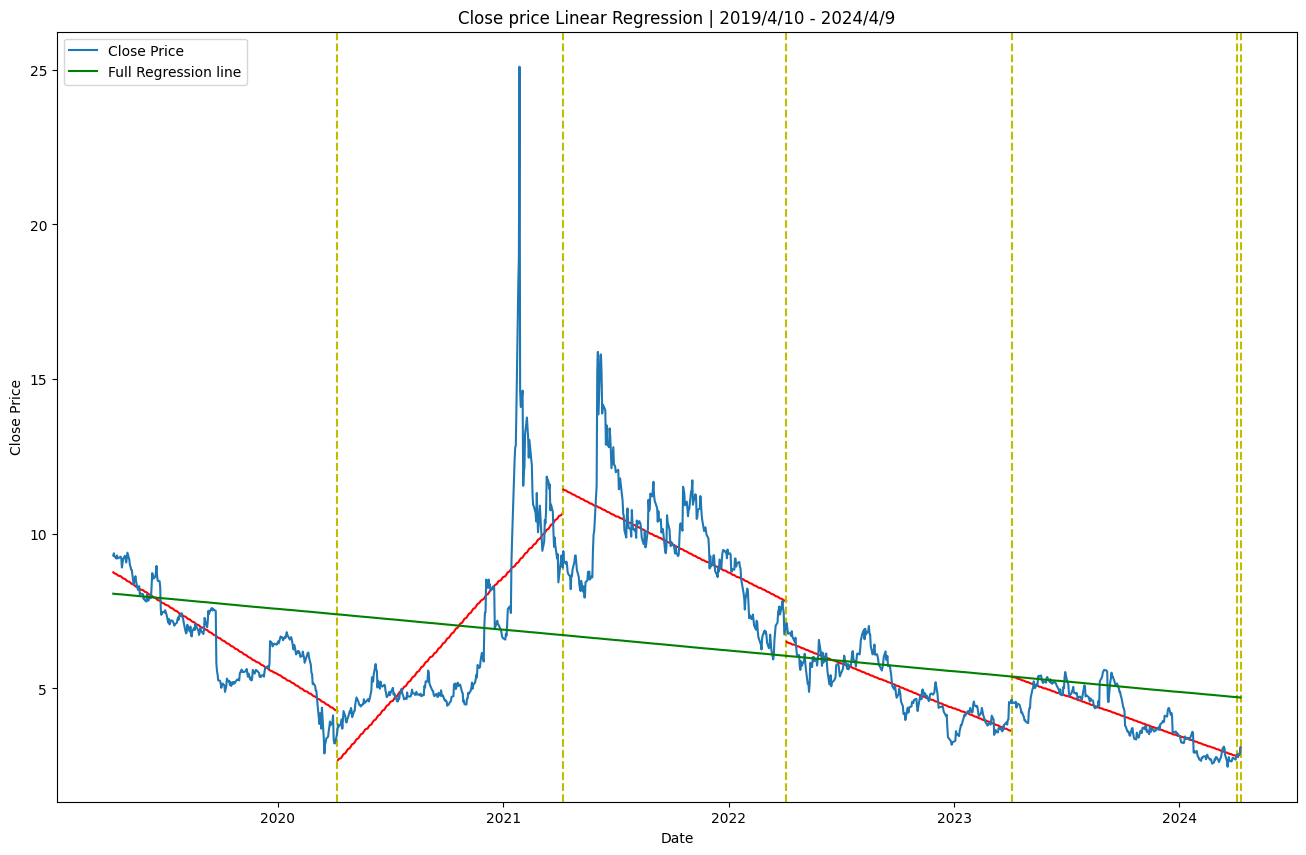

In [35]:
plotting.plot_regression_line(history, reg_line_count=5, log_scale=False)

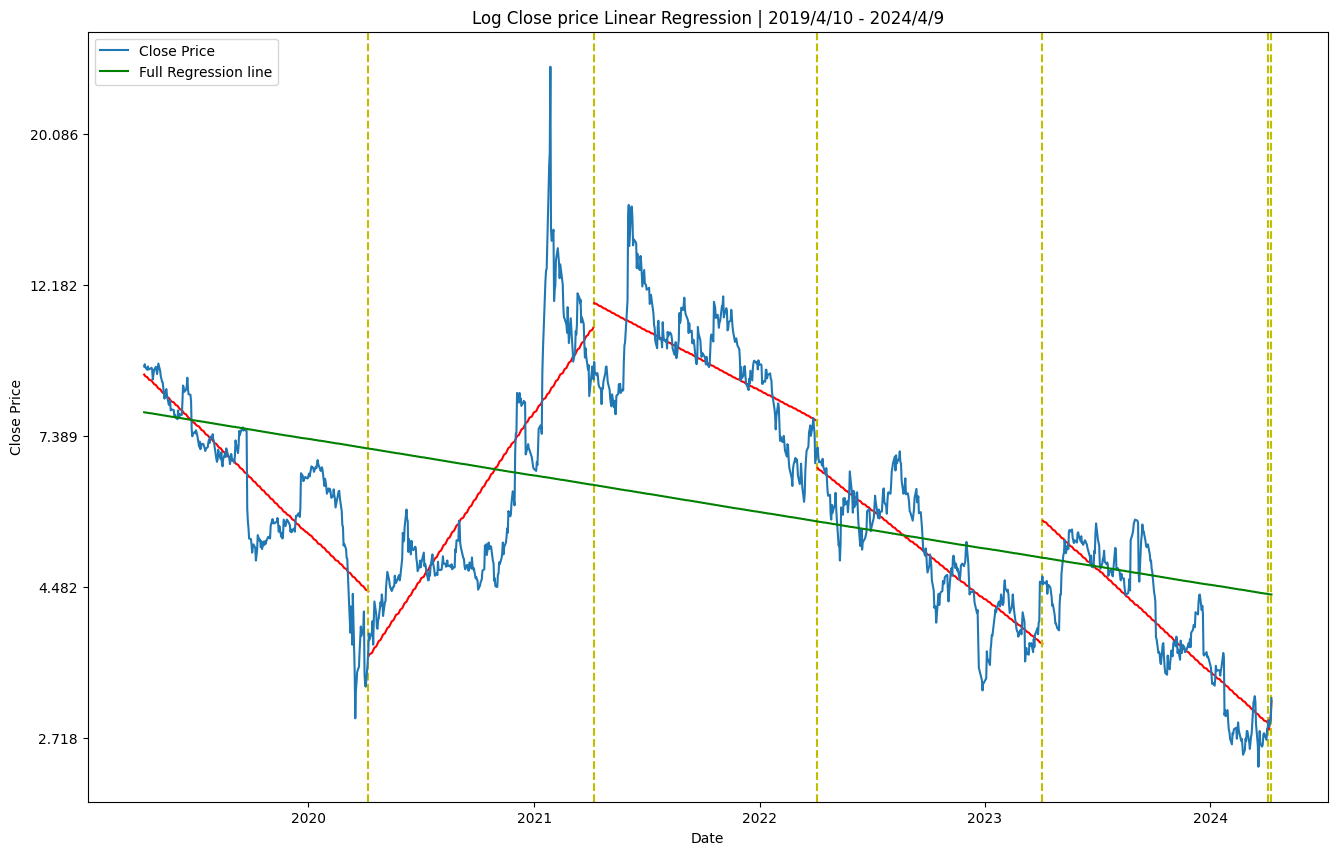

In [36]:
plotting.plot_regression_line(history, reg_line_count=5, log_scale=True)

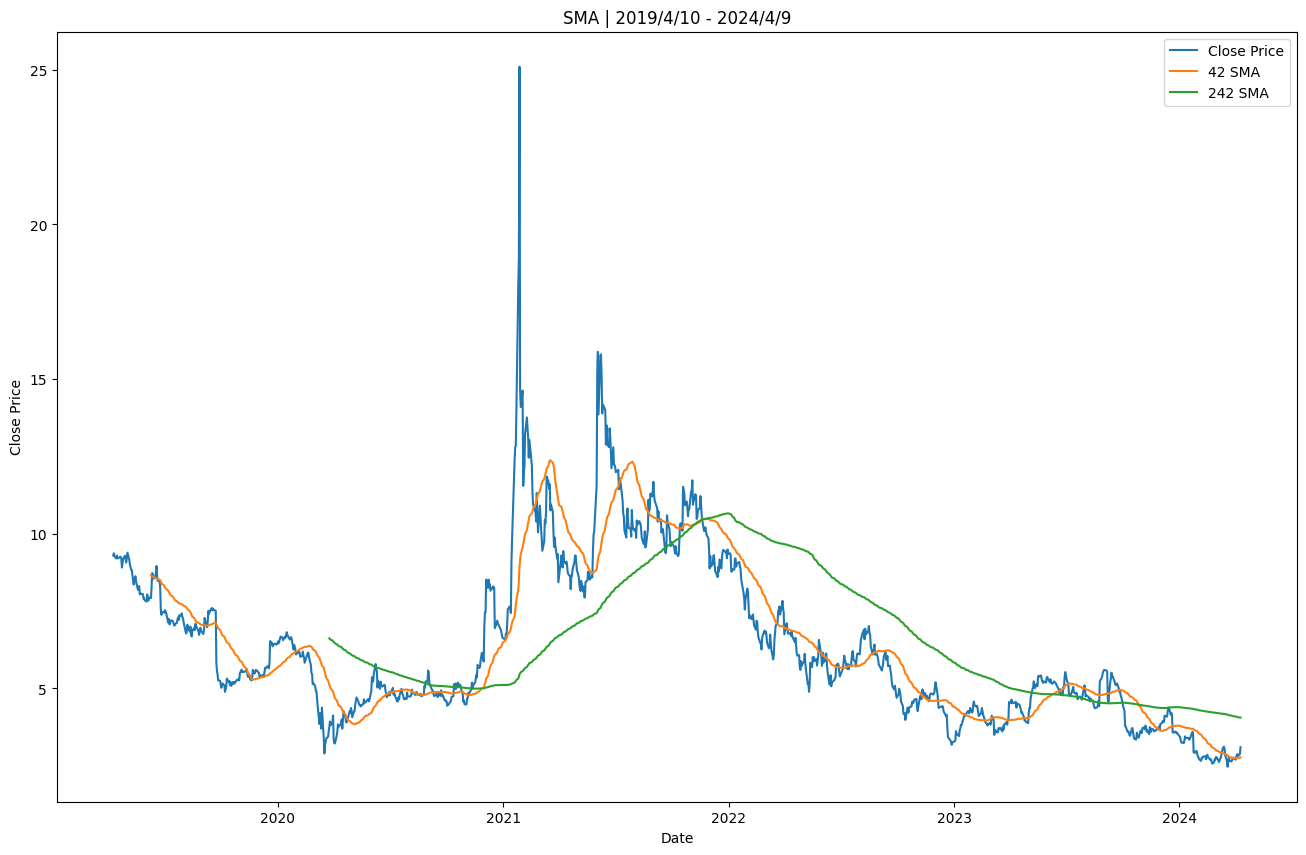

In [37]:
plotting.plot_sma(history, [42, 242], hide_data=False)